In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv
/kaggle/input/crab-age-prediction/CrabAgePrediction.csv


In [2]:
def load_dataset(path:str):
    return pd.read_csv(path)

In [3]:
train = load_dataset("/kaggle/input/playground-series-s3e16/train.csv")
original = load_dataset("/kaggle/input/crab-age-prediction/CrabAgePrediction.csv")

train['type'] = 0
original['type'] = 1

trained = pd.concat([train,original], axis=0)
trained.drop(['id'],axis=1,inplace=True)

trained

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,type
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,0
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0
...,...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,1
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,1
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,1


In [4]:
def data_info(dataset):
    print("Data Type")
    print(dataset.info())
    print("Feature Characteristics")
    for feature in dataset.columns:
        print(f"Number of Unique values for {feature} :", dataset[feature].nunique())
        if dataset[feature].nunique() <= 10:
            print(f"Unique values for {feature} : ", dataset[feature].unique())

In [5]:
data_info(trained)

Data Type
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77944 entries, 0 to 3892
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             77944 non-null  object 
 1   Length          77944 non-null  float64
 2   Diameter        77944 non-null  float64
 3   Height          77944 non-null  float64
 4   Weight          77944 non-null  float64
 5   Shucked Weight  77944 non-null  float64
 6   Viscera Weight  77944 non-null  float64
 7   Shell Weight    77944 non-null  float64
 8   Age             77944 non-null  int64  
 9   type            77944 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.5+ MB
None
Feature Characteristics
Number of Unique values for Sex : 3
Unique values for Sex :  ['I' 'M' 'F']
Number of Unique values for Length : 146
Number of Unique values for Diameter : 123
Number of Unique values for Height : 65
Number of Unique values for Weight : 3099
Number of 

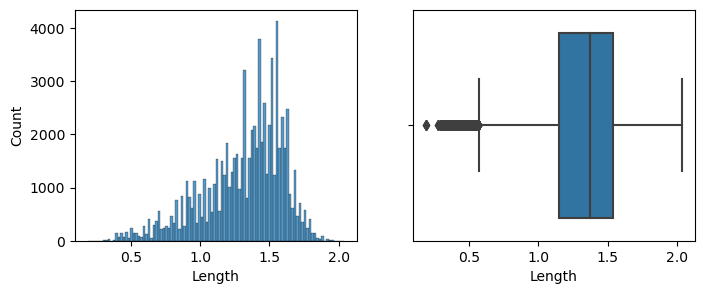

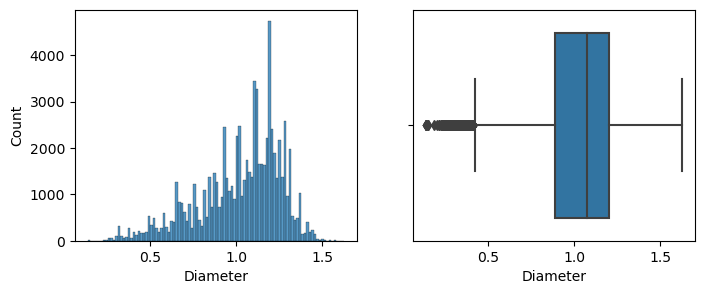

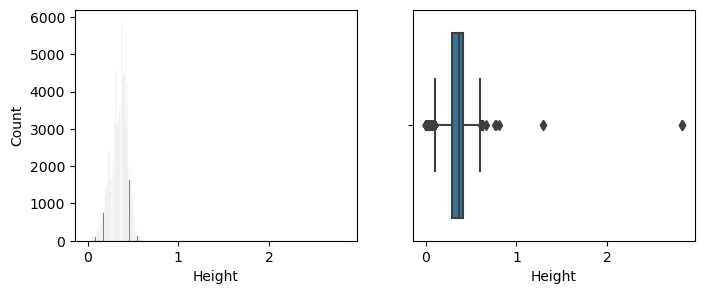

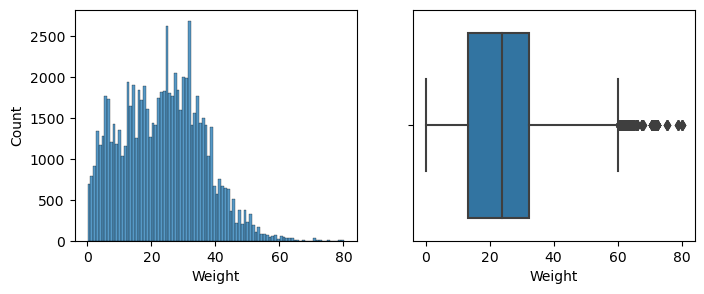

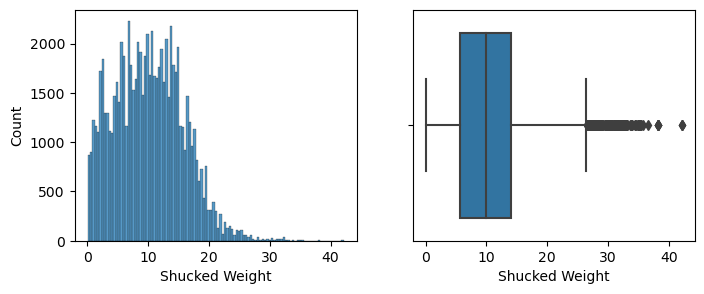

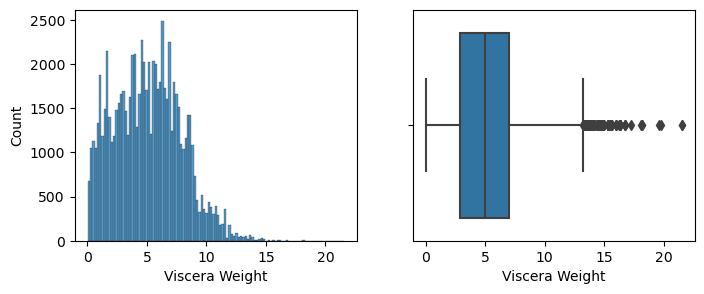

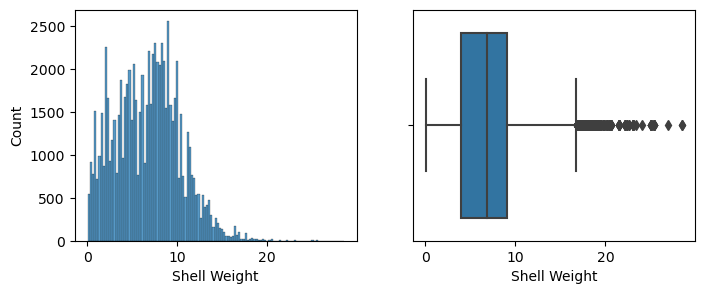

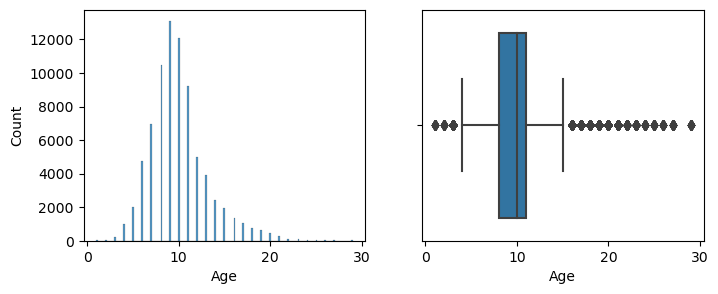

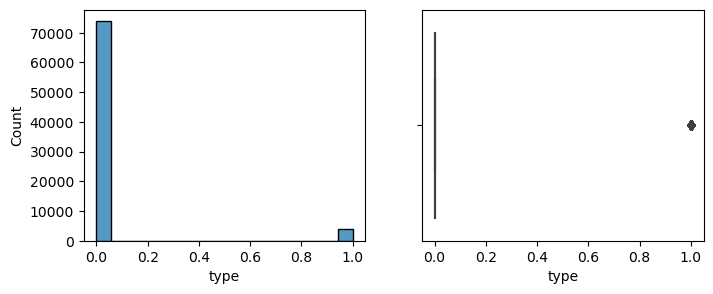

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical = trained.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    sns.histplot(data=trained, x=col, ax=ax[0])
    sns.boxplot(data=trained, x=col, ax=ax[1])

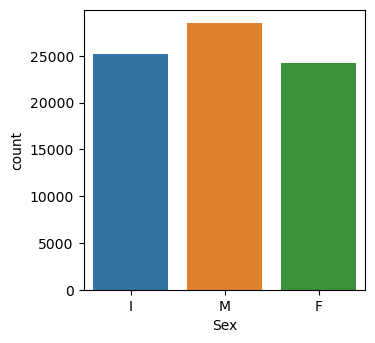

In [70]:
plt.figure(figsize=(8, 8))
ax = plt.subplot(2, 2,1)
sns.countplot(data=trained, x='Sex', ax=ax)
plt.show()

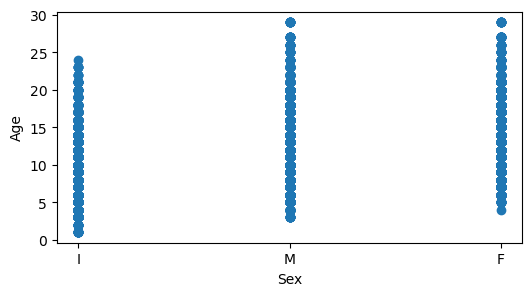

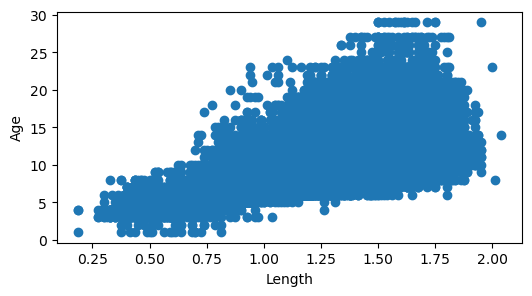

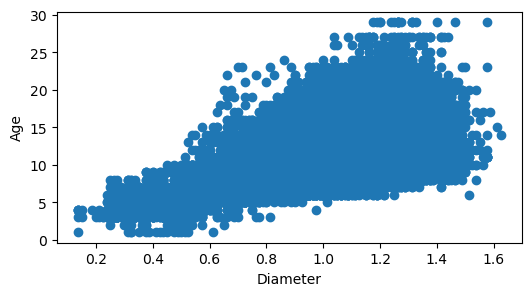

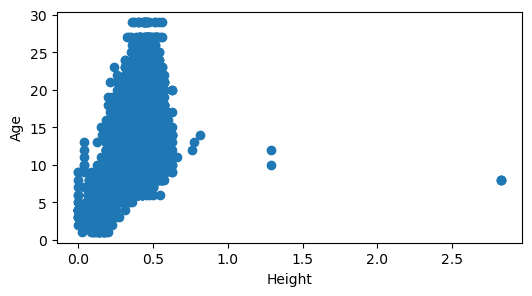

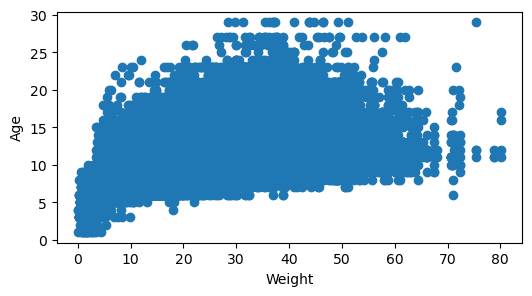

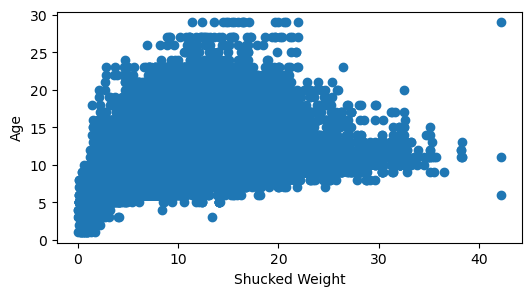

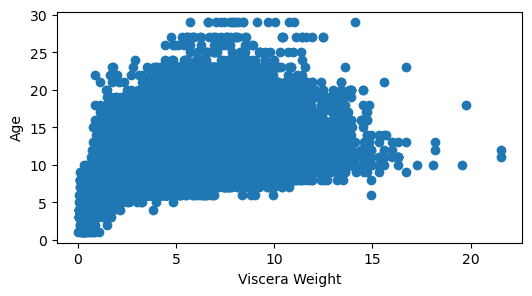

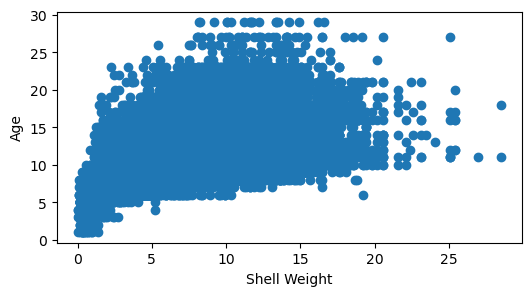

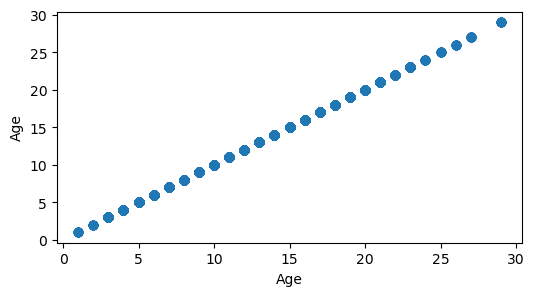

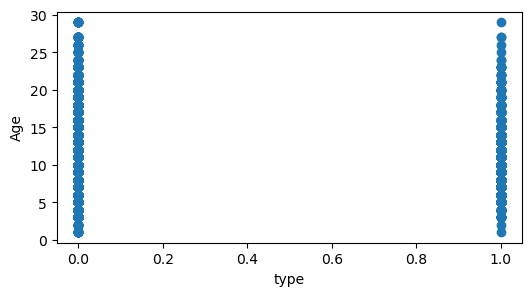

In [7]:
for feature in trained.columns:
    plt.figure(figsize=(6,3))
    plt.scatter(trained[feature], trained.Age)
    plt.xlabel(f"{feature}")
    plt.ylabel("Age")
    plt.show()

In [9]:
correlation = trained.corr()
correlation.to_html('/kaggle/working/correlation.html')

/tmp/ipykernel_32/2704553548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = trained.corr()


# Variables to keep due to high correlations
1) Length
2) Height
3) Shucked weight

In [10]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

x = trained[['Length','Height','Shucked Weight']]
y  = trained['Age']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 36127.57262477311, 'Test Statistic p-value': 0.0, 'F-Statistic': 7481.2869850152065, 'F-Test p-value': 0.0}


**There is heteroscedasticity present in our model**

**Step 1) Log of variable AGE**

In [11]:
trained['log_of_age'] = np.log(trained['Age'])

In [24]:
x = trained[['Length','Height','Shucked Weight']]
y  = trained['Age']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 36127.57262477311, 'Test Statistic p-value': 0.0, 'F-Statistic': 7481.2869850152065, 'F-Test p-value': 0.0}


In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 2.019e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:08:14   Log-Likelihood:            -1.7830e+05
No. Observations:               77944   AIC:                         3.566e+05
Df Residuals:                   77940   BIC:                         3.566e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5099      0.064    -23.

**Using weighted Least square regression**

In [26]:
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute residuals
model_abs_resid = np.abs(model_residuals)

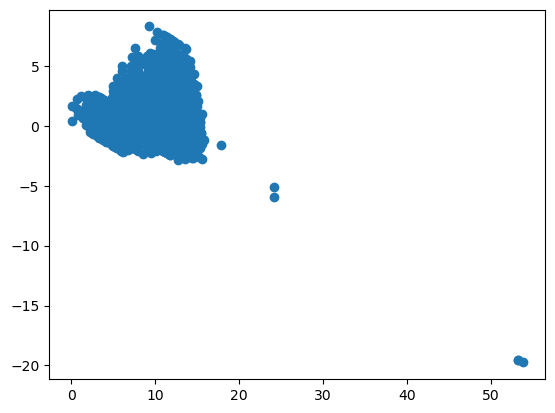

In [27]:
plt.scatter(model_fitted_y,model_norm_residuals)
plt.show()

In [28]:
trained["weight_1"] = model_fitted_y  
trained["weight_1"] = trained["weight_1"]**-1
y = trained['Age']
model_wls_1 = sm.WLS(y, x, trained['weight_1']) 
mod_res_1 = model_wls_1.fit() 
print(mod_res_1.summary())

                            WLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.546
Model:                            WLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 3.122e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:08:41   Log-Likelihood:            -1.7502e+05
No. Observations:               77944   AIC:                         3.500e+05
Df Residuals:                   77940   BIC:                         3.501e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0688      0.044      1.

**Final model that we will use is WLS**

In [29]:
test = load_dataset("/kaggle/input/playground-series-s3e16/test.csv")
submission = load_dataset("/kaggle/input/playground-series-s3e16/sample_submission.csv")

predictions = 3.8680*test['Length'] + 18.8096*test['Height'] + -0.1726*test['Shucked Weight']

In [30]:
print("Std of trained data age feature :", np.std(trained.Age))
print("Std of predicted age feature :", np.std(predictions))

Std of trained data age feature : 3.177451216334392
Std of predicted age feature : 1.9624426155743244


In [32]:
x = trained[['Length','Height','Shucked Weight']]
y = trained['Age']

x = sm.add_constant(x)

model_ols = sm.OLS(y,x).fit()

print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 2.019e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:11:29   Log-Likelihood:            -1.7830e+05
No. Observations:               77944   AIC:                         3.566e+05
Df Residuals:                   77940   BIC:                         3.566e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5099      0.064    -23.

In [34]:
x = trained[['Length','Height','Shucked Weight','Sex_M','Sex_I']]
y = trained['Age']

model_ols = sm.OLS(y,x).fit()

print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Age   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                          2.953e+05
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                        0.00
Time:                        11:11:53   Log-Likelihood:                     -1.7694e+05
No. Observations:               77944   AIC:                                  3.539e+05
Df Residuals:                   77939   BIC:                                  3.539e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [35]:
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute residuals
model_abs_resid = np.abs(model_residuals)

In [40]:
trained["weight_1"] = model_fitted_y  
#trained["weight_1"] = trained["weight_1"]**-1
y = trained['Age']
model_wls_2 = sm.WLS(y, x, trained['weight_1']) 
mod_res_2 = model_wls_2.fit() 
print(mod_res_2.summary())

                                 WLS Regression Results                                
Dep. Variable:                    Age   R-squared (uncentered):                   0.947
Model:                            WLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          2.808e+05
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                        0.00
Time:                        11:17:58   Log-Likelihood:                     -1.8296e+05
No. Observations:               77944   AIC:                                  3.659e+05
Df Residuals:                   77939   BIC:                                  3.660e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [42]:
#test = pd.get_dummies(data=test, columns=['Sex'])

#test.drop(['Sex_F'],axis=1,inplace=True)

submission['Age'] = 7.3907*test['Length'] + 9.8951*test['Height'] + -0.2633*test['Shucked Weight'] + -0.2230*test['Sex_M'] + -1.4426*test['Sex_I']

In [43]:
print("Std of trained data age feature :", np.std(trained.Age))
print("Std of predicted age feature :", np.std(submission.Age))

Std of trained data age feature : 3.177451216334392
Std of predicted age feature : 2.172301738586926


In [39]:
submission.to_csv("/kaggle/working/submission5.csv", index=False)